#### Research Project: 

# Understanding Hygiene Habits & Attitudes in the Post-Pandemic Era

#### Importing Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from category_encoders import OrdinalEncoder  # If you choose to use it
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

#### Exploring Dataset

In [88]:
#Loading Dataset

df = pd.read_csv("hygeine1.csv")
df

,ID,Start_time,Completion_time,Age_Range,Gender,Employment Status,Country,Covid_Impact,Hygiene_Concern,Hygiene_Product,...,PostCOVID_Spend,Purchase_Frequency,Usage_Change,Products_Essential,Awareness_Impact,Info_Source,Purchase_Factors,Brand_Switch,Health_Belief,Precautions_Continuity
0,1,3-29-24 20:14:36,3-29-24 20:17:53,Below 20,Female,Self-employed,United States,Actually improved some aspects of my daily rou...,Very concerned,Mask;Gloves;Hand sanitizer/ Clorox;,...,$80-$120,Monthly,Increased usage,"Yes, definitely",Significantly increased awareness and importance,Social media and online platforms;Recommendati...,Price;Brand reputation/trust;Availability;,No,Extremely significant,"No, I will reduce my precautions"
1,2,3-29-24 20:22:10,3-29-24 20:37:03,31-40,Female,Student,United States,Actually improved some aspects of my daily rou...,Very concerned,Mask;Gloves;Hand sanitizer/ Clorox;Disinfectan...,...,$40-$80,Less frequently (less than once a month),Increased usage,"Yes, definitely",Significantly increased awareness and importance,Recommendations from friends and family;Social...,Product effectiveness;Recommendations (Health ...,No,Extremely significant,"Yes, I will continue with the same precautions"
2,3,3-29-24 21:14:55,3-29-24 21:15:35,21-30,Male,Student,United States,No major impact on my daily routines,Somewhat concerned,Mask;,...,Above $120,Less frequently (less than once a month),Decreased usage,"Yes, to some extent",Somewhat increased awareness and importance,Recommendations from friends and family;,Ingredients/composition;,No,Neutral,"No, I will reduce my precautions"
3,4,3-29-24 21:15:25,3-29-24 21:17:44,21-30,Female,Employed,India,Actually improved some aspects of my daily rou...,Somewhat concerned,Hand sanitizer/ Clorox;Gloves;,...,Less than $40,Monthly,Increased usage,"Yes, to some extent",Significantly increased awareness and importance,Television advertisements;Social media and onl...,Brand reputation/trust;,Yes,Somewhat significant,"Yes, I will continue with the same precautions"
4,5,3-29-24 21:15:12,3-29-24 21:18:47,21-30,Male,Student,United States,Significantly disrupted my daily routines,Somewhat concerned,Mask;Hand sanitizer/ Clorox;,...,$40-$80,Monthly,Increased usage,"Yes, to some extent",Somewhat increased awareness and importance,In-store displays and promotions;,Product effectiveness;Ingredients/composition;...,Yes,Somewhat significant,"Yes, I will continue with the same precautions"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,118,3-30-24 18:37:04,3-30-24 18:40:01,21-30,Female,Student,United States,No major impact on my daily routines,Very concerned,Mask;Hand sanitizer/ Clorox;Disinfectant spray...,...,Less than $40,Monthly,Increased usage,"No, not really",Significantly increased awareness and importance,Recommendations from friends and family;Other;,Product effectiveness;Price;,Yes,Extremely significant,"Yes, I will continue with the same precautions"
118,119,3-30-24 18:40:13,3-30-24 18:41:40,31-40,Female,Student,India,Significantly disrupted my daily routines,Neutral,Gloves;Hand sanitizer/ Clorox;Mask;Disinfectan...,...,Less than $40,Monthly,Decreased usage,"Yes, to some extent",Somewhat increased awareness and importance,Recommendations from friends and family;In-sto...,Price;Brand reputation/trust;Availability;Ingr...,Yes,Neutral,"No, I will reduce my precautions"
119,120,3-30-24 18:57:35,3-30-24 18:59:50,31-40,Male,Student,United States,Actually improved some aspects of my daily rou...,Very concerned,Hand sanitizer/ Clorox;Disinfectant spray;,...,Less than $40,Monthly,Increased usage,"Yes, definitely",Significantly increased awareness and importance,Social media and online platforms;Other;In-sto...,Ingredients/composition;Product effectiveness;,Yes,Somewhat significant,"Yes, I will continue with the same precautions"
120,121,3-30-24 18:59:54,3-30-24 19:01:13,21-30,Male,Student,United States,No major impact on my daily routines,Somewhat concerned,H

In [89]:
df.describe()

,ID
count,122.000000
mean,61.500000
std,35.362409
min,1.000000
25%,31.250000
50%,61.500000
75%,91.750000
max,122.000000


In [90]:
df.info()  # Data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      122 non-null    int64 
 1   Start_time              122 non-null    object
 2   Completion_time         122 non-null    object
 3   Age_Range               122 non-null    object
 4   Gender                  122 non-null    object
 5   Employment Status       122 non-null    object
 6   Country                 122 non-null    object
 7   Covid_Impact            122 non-null    object
 8   Hygiene_Concern         122 non-null    object
 9   Hygiene_Product         122 non-null    object
 10  Usage_Frequency         122 non-null    object
 11  PreCOVID_Spend          122 non-null    object
 12  PostCOVID_Spend         122 non-null    object
 13  Purchase_Frequency      122 non-null    object
 14  Usage_Change            122 non-null    object
 15  Produc

In [91]:
df['Age_Range'].value_counts()

Age_Range
21-30       71
31-40       29
41-50        8
61 above     7
Below 20     4
51-60        3
Name: count, dtype: int64

In [92]:
df['PreCOVID_Spend'].value_counts()


PreCOVID_Spend
Less than $40    102
$40 - $80         17
 $80 - $120        3
Name: count, dtype: int64

In [93]:
df['PostCOVID_Spend'].value_counts()

PostCOVID_Spend
Less than $40    69
$40-$80          40
$80-$120         10
Above $120        3
Name: count, dtype: int64

In [94]:
df['Awareness_Impact'].value_counts()

Awareness_Impact
 Significantly increased awareness and importance    84
Somewhat increased awareness and importance          34
No significant change                                 4
Name: count, dtype: int64

In [95]:
df['Usage_Change'].value_counts()

Usage_Change
Increased usage       96
Decreased usage       13
No change in usage    13
Name: count, dtype: int64

<Axes: xlabel='Age_Range'>

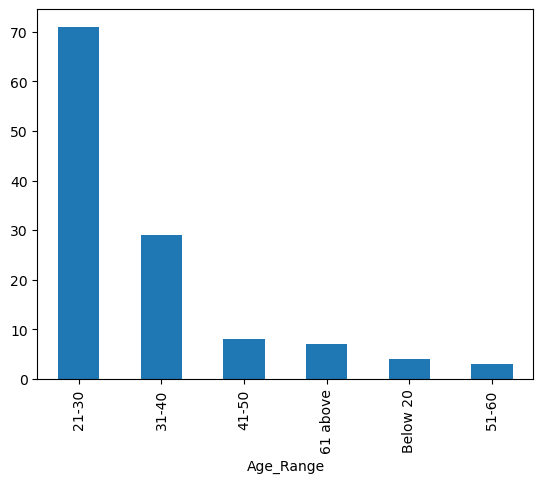

In [96]:
df['Age_Range'].value_counts().plot(kind='bar')

<Axes: xlabel='PreCOVID_Spend'>

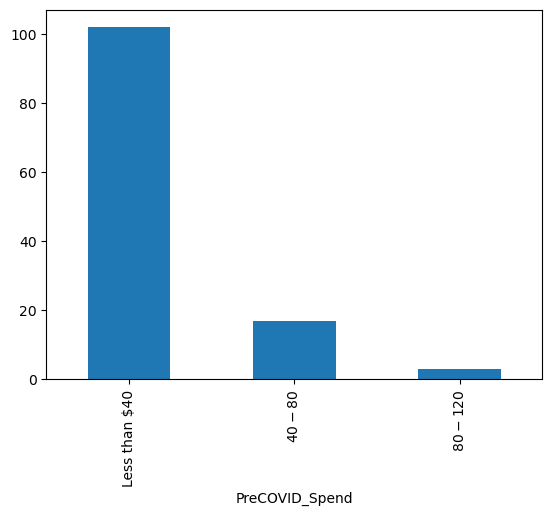

In [97]:
df['PreCOVID_Spend'].value_counts().plot(kind='bar')

<Axes: xlabel='PostCOVID_Spend'>

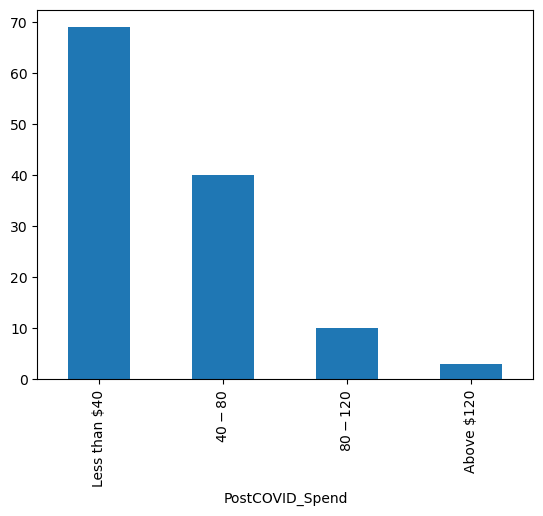

In [98]:
df['PostCOVID_Spend'].value_counts().plot(kind='bar')

<Axes: xlabel='Usage_Change'>

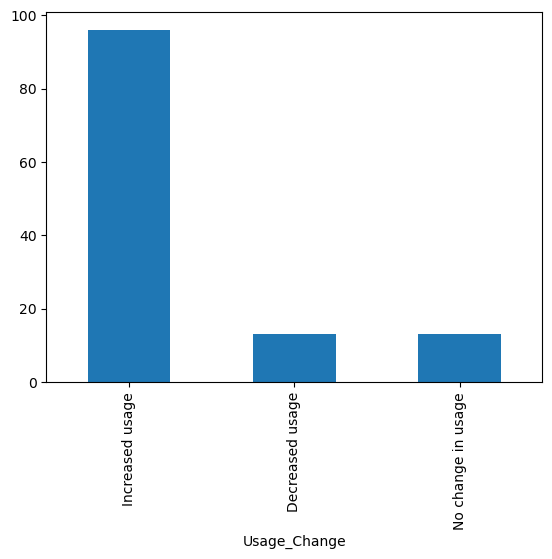

In [99]:
df['Usage_Change'].value_counts().plot(kind='bar')

<Axes: xlabel='PostCOVID_Spend'>

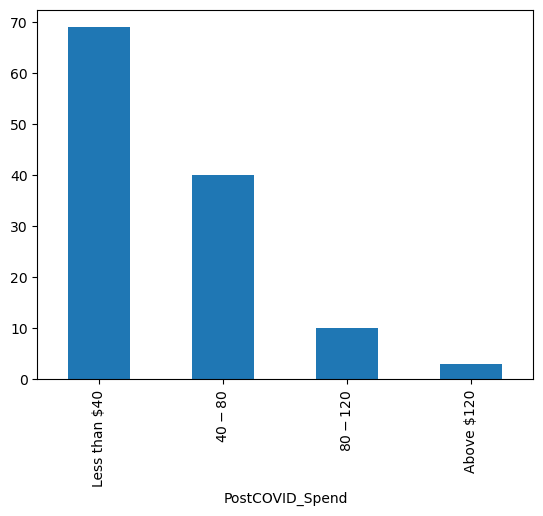

In [100]:
df['PostCOVID_Spend'].value_counts().plot(kind='bar')


In [101]:
df_dropped = df.drop(['Start_time', 'Completion_time'], axis=1, errors='ignore')

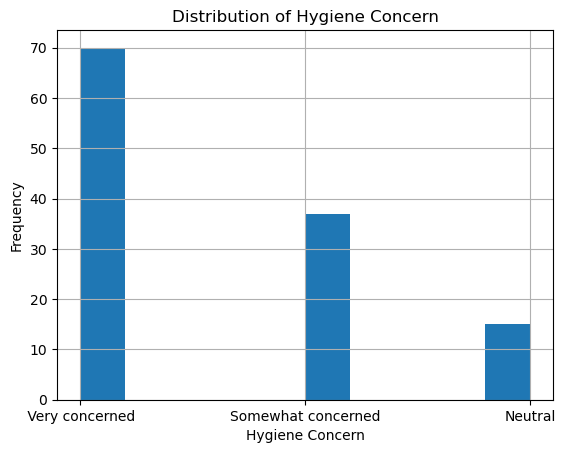

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical data
df['Hygiene_Concern'].hist()
plt.title('Distribution of Hygiene Concern')
plt.xlabel('Hygiene Concern')
plt.ylabel('Frequency')
plt.show()

In [103]:
#Mapping from text to numerical scale
concern_mapping = {
    'Neutral': 1,
    'Somewhat concerned': 2,
    ' Very concerned': 3
}

# Apply the mapping to convert text responses to numerical scale
df['Hygiene_Concern_Scale'] = df['Hygiene_Concern'].map(concern_mapping)

#print(df)
value_counts = df['Hygiene_Concern_Scale'].value_counts()
value_counts
df['Hygiene_Concern_Scale']

0      3
1      3
2      2
3      2
4      2
      ..
117    3
118    1
119    3
120    2
121    3
Name: Hygiene_Concern_Scale, Length: 122, dtype: int64

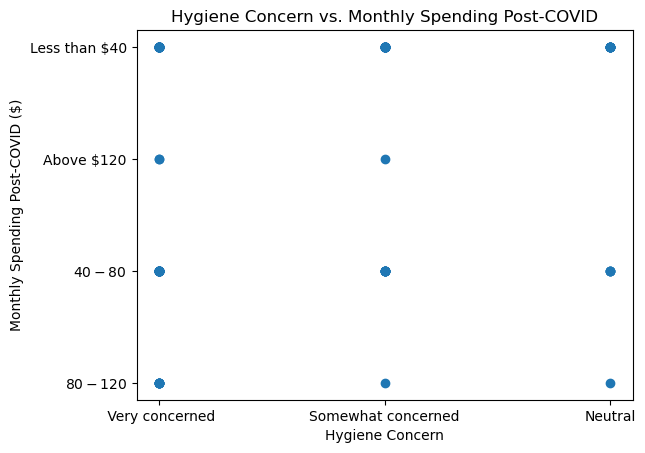

In [104]:
# Scatter plot for numerical variables
plt.scatter(df['Hygiene_Concern'], df['PostCOVID_Spend'])
plt.title('Hygiene Concern vs. Monthly Spending Post-COVID')
plt.xlabel('Hygiene Concern')
plt.ylabel('Monthly Spending Post-COVID ($)')
plt.show()



In [105]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Assuming 'df' is your DataFrame and it contains the necessary variables
# Let's say 'dv1', 'dv2' are your dependent variables and 'group' is your independent variable

# Prepare the data
dv_columns = ['Usage_Frequency', 'PostCOVID_Spend', 'Precautions_Continuity']
iv_column = 'Age_Range'

# Run MANOVA
maov = MANOVA.from_formula(' + '.join(dv_columns) + ' ~ ' + iv_column, data=df)
print(maov.mv_test())

                                 Multivariate linear model
                                                                                           
-------------------------------------------------------------------------------------------
       Intercept                Value         Num DF  Den DF         F Value         Pr > F
-------------------------------------------------------------------------------------------
          Wilks' lambda                0.0000 9.0000 108.0000 18014398509481970.0000 0.0000
         Pillai's trace                1.0000 9.0000 108.0000 18014398509481974.0000 0.0000
 Hotelling-Lawley trace 1501199875790164.2500 9.0000 108.0000 18014398509481972.0000 0.0000
    Roy's greatest root 1501199875790164.2500 9.0000 108.0000 18014398509481972.0000 0.0000
-------------------------------------------------------------------------------------------
                                                                                           
---------------------

In [106]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Assuming 'df' is your DataFrame and it contains the necessary variables
# Let's say 'dv1', 'dv2' are your dependent variables and 'group' is your independent variable

# Prepare the data
dv_columns = ['Usage_Frequency', 'PostCOVID_Spend', 'Precautions_Continuity']
iv_column = 'Gender'

# Run MANOVA
maov = MANOVA.from_formula(' + '.join(dv_columns) + ' ~ ' + iv_column, data=df)
print(maov.mv_test())

                                Multivariate linear model
                                                                                         
-----------------------------------------------------------------------------------------
       Intercept               Value         Num DF  Den DF         F Value        Pr > F
-----------------------------------------------------------------------------------------
          Wilks' lambda               0.0000 9.0000 112.0000 4003199668773762.0000 0.0000
         Pillai's trace               1.0000 9.0000 112.0000 4003199668773761.5000 0.0000
 Hotelling-Lawley trace 321685687669320.1250 9.0000 112.0000 4003199668773761.5000 0.0000
    Roy's greatest root 321685687669320.1250 9.0000 112.0000 4003199668773761.5000 0.0000
-----------------------------------------------------------------------------------------
                                                                                         
------------------------------------------

In [110]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Assuming 'df' is your DataFrame and it contains the necessary variables
# Let's say 'dv1', 'dv2' are your dependent variables and 'group' is your independent variable

# Prepare the data
df.rename(columns={'Employment Status': 'Employment_Status'}, inplace=True)
iv_column = 'Employment_Status'

# Run MANOVA
maov = MANOVA.from_formula(' + '.join(dv_columns) + ' ~ ' + iv_column, data=df)
print(maov.mv_test())

                                  Multivariate linear model
                                                                                             
---------------------------------------------------------------------------------------------
       Intercept                Value          Num DF  Den DF          F Value         Pr > F
---------------------------------------------------------------------------------------------
          Wilks' lambda                -0.0000 9.0000 108.0000 -18014398509481996.0000 1.0000
         Pillai's trace                 1.0000 9.0000 108.0000 -18014398509481996.0000 1.0000
 Hotelling-Lawley trace -1501199875790166.2500 9.0000 108.0000 -18014398509481996.0000 1.0000
    Roy's greatest root -1501199875790166.2500 9.0000 108.0000 -18014398509481996.0000 1.0000
---------------------------------------------------------------------------------------------
                                                                                             


In [111]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Assuming 'df' is your DataFrame and it contains the necessary variables
# Let's say 'dv1', 'dv2' are your dependent variables and 'group' is your independent variable

# Prepare the data
dv_columns = ['Usage_Frequency', 'PostCOVID_Spend', 'Precautions_Continuity']
iv_column = ['Age_Range', 'Gender', 'Country', 'Employment_Status']

# Run MANOVA
maov = MANOVA.from_formula(' + '.join(dv_columns) + ' ~ ' + ' + '.join(iv_column), data=df)
print(maov.mv_test())

                               Multivariate linear model
                                                                                        
----------------------------------------------------------------------------------------
       Intercept               Value         Num DF  Den DF        F Value        Pr > F
----------------------------------------------------------------------------------------
          Wilks' lambda               0.0000 9.0000 93.0000 1163429903737367.7500 0.0000
         Pillai's trace               1.0000 9.0000 93.0000 1163429903737367.7500 0.0000
 Hotelling-Lawley trace 112589990684261.4062 9.0000 93.0000 1163429903737368.0000 0.0000
    Roy's greatest root 112589990684261.4062 9.0000 93.0000 1163429903737368.0000 0.0000
----------------------------------------------------------------------------------------
                                                                                        
-----------------------------------------------------